In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go




In [2]:
astor=pd.read_csv("/Users/Bora/Documents/GitHub/Borsa-Hisse-Analizi/astor.csv")
astor.index=pd.to_datetime(astor["Date"])


In [3]:
del astor["Date"]

In [4]:
astor=pd.DataFrame(astor)

In [5]:
close=pd.DataFrame(astor["Price"])

close

,Price
Date,
2023-01-19,14.96
2023-01-20,16.45
2023-01-23,18.09
2023-01-24,19.89
2023-01-25,21.86
...,...
2023-06-12,53.85
2023-06-13,51.65
2023-06-14,52.50


In [13]:
rolling_app5=close.rolling(window=2).mean()
rolling_app14=close.rolling(window=10).mean()
rolling_app21=close.rolling(window=20).mean()


In [14]:
MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns=["Close","short","mid","long"]


In [15]:
MAs.dropna(axis=0,inplace=True)
MAs

,Close,short,mid,long
Date,,,,
2023-02-21,28.59,28.235,25.735,24.0450
2023-02-22,30.73,29.660,26.372,24.8335
2023-02-23,33.80,32.265,27.116,25.7010
2023-02-24,36.01,34.905,28.022,26.5970
2023-02-27,36.72,36.365,29.268,27.4385
...,...,...,...,...
2023-06-12,53.85,53.025,54.015,51.7510
2023-06-13,51.65,52.750,53.890,52.1865
2023-06-14,52.50,52.075,53.890,52.4505


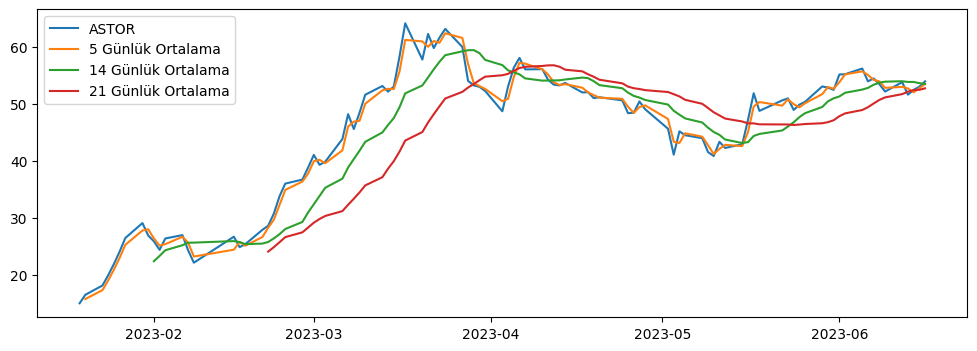

In [16]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(close.index,close,label='ASTOR')
ax.plot(rolling_app5.index,rolling_app5,label='5 Günlük Ortalama')
ax.plot(rolling_app14.index,rolling_app14,label='14 Günlük Ortalama')
ax.plot(rolling_app21.index,rolling_app21,label='21 Günlük Ortalama')
ax.legend(loc='upper left')


In [17]:
def buy_sell(data,perc=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))

    for i in range(0,len(data)):
        if (data["short"][i]>data["mid"][i]+sm) & (data["short"][i]>data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i]<data["mid"][i]-sm)&(data["short"][i]<data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    operations=operations[neg:-pos]
    PL=np.sum(operations)

    return (buy_signal,sell_signal,PL)


In [18]:
m=buy_sell(MAs)
MAs["Al"]=m[0]
MAs["Sat"]=m[1]

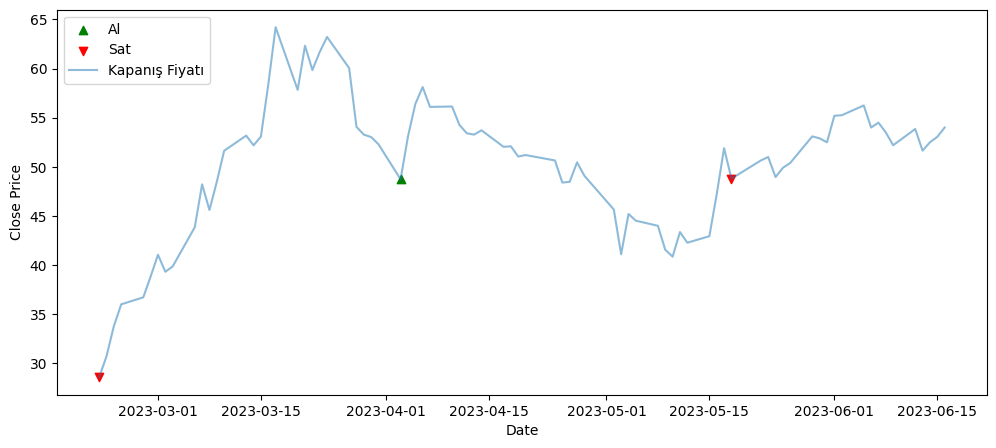

In [20]:
plt.figure(figsize=(12,5))
plt.scatter(MAs.index,MAs["Al"],color="green",label='Al',marker='^',alpha=1)
plt.scatter(MAs.index,MAs["Sat"],color="red",label='Sat',marker='v',alpha=1)
plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.show()

In [140]:
al=MAs["Al"]
al=al.dropna(axis=0)
al

Date
2023-02-03    26.36
2023-03-28    54.07
2023-04-12    53.42
2023-05-26    50.40
2023-06-09    52.20
Name: Al, dtype: float64

In [104]:
del al["2023-06-09"]

In [142]:
sat=MAs["Sat"]
sat=sat.dropna(axis=0)
sat


Date
2023-01-27    26.44
2023-02-20    27.88
2023-04-06    58.12
2023-05-16    47.22
2023-05-29    53.10
Name: Sat, dtype: float64

In [107]:
del sat["2023-01-27"]

In [108]:
sat_val=sat.values
al_val=al.values


In [109]:
res=[]

for i in range(4):
    res.append((sat_val[i]/al_val[i]))




In [110]:
df=pd.DataFrame()
df["Kar"]=res
df

,Kar
0,1.057663
1,1.074903
2,0.883939
3,1.053571


In [111]:
df["Eldeki Para"]=df["Kar"]*100
df  

,Kar,Eldeki Para
0,1.057663,105.766313
1,1.074903,107.490290
2,0.883939,88.393860
3,1.053571,105.357143


In [112]:
df["Son Kar"]=df["Eldeki Para"]-100
df

,Kar,Eldeki Para,Son Kar
0,1.057663,105.766313,5.766313
1,1.074903,107.490290,7.490290
2,0.883939,88.393860,-11.606140
3,1.053571,105.357143,5.357143


In [113]:

df["Yatırılan Para"]=[100,100,100,100]


In [114]:
karlilik=df["Eldeki Para"].sum()/df["Yatırılan Para"].sum()
karlilik

1.0175190144846564

In [115]:
karlilik_yuzde=(karlilik-1)*100
print("Karlılık oranı %",karlilik_yuzde)

Karlılık oranı % 1.7519014484656426


Her sat tavsiyesinde satmayıp 3.sat tavsiyesinde satarsak ne olur?(Yani 2 adet sat tavsiyesini pas geçersek)

In [116]:
sat_val1=sat_val[1:4:2]

In [117]:
sat_val1

array([58.12, 53.1 ])

In [118]:
al_val1=al_val[0:4:2]
al_val1

array([26.36, 53.42])

In [119]:
res1=[]

for i in range(2):
    res1.append((sat_val1[i]/al_val1[i]))

In [120]:
df1=pd.DataFrame()
df1["Kar"]=res1
df1

,Kar
0,2.204856
1,0.994010


In [121]:
df1["Eldeki Para"]=df1["Kar"]*100
df1 

,Kar,Eldeki Para
0,2.204856,220.485584
1,0.994010,99.400973


In [122]:
df1["Son Kar"]=df1["Eldeki Para"]-100

In [124]:
df1["Yatırılan Para"]=[100,100]

In [125]:
df1

,Kar,Eldeki Para,Son Kar,Yatırılan Para
0,2.204856,220.485584,120.485584,100
1,0.994010,99.400973,-0.599027,100


İlk aşamada 100 TL yatırıp 220 TL kazanırız,toplamda 200 TL yatırıp 321 TL kazanırız.

In [126]:
karlilik=df1["Eldeki Para"].sum()/df1["Yatırılan Para"].sum()
karlilik

1.5994327881835415

In [127]:
karlilik_yuzde=(karlilik-1)*100
print("Karlılık oranı %",karlilik_yuzde)

Karlılık oranı % 59.94327881835415
